verkko median N T2T contig: 5.0
verkko median N T2T any: 9.0


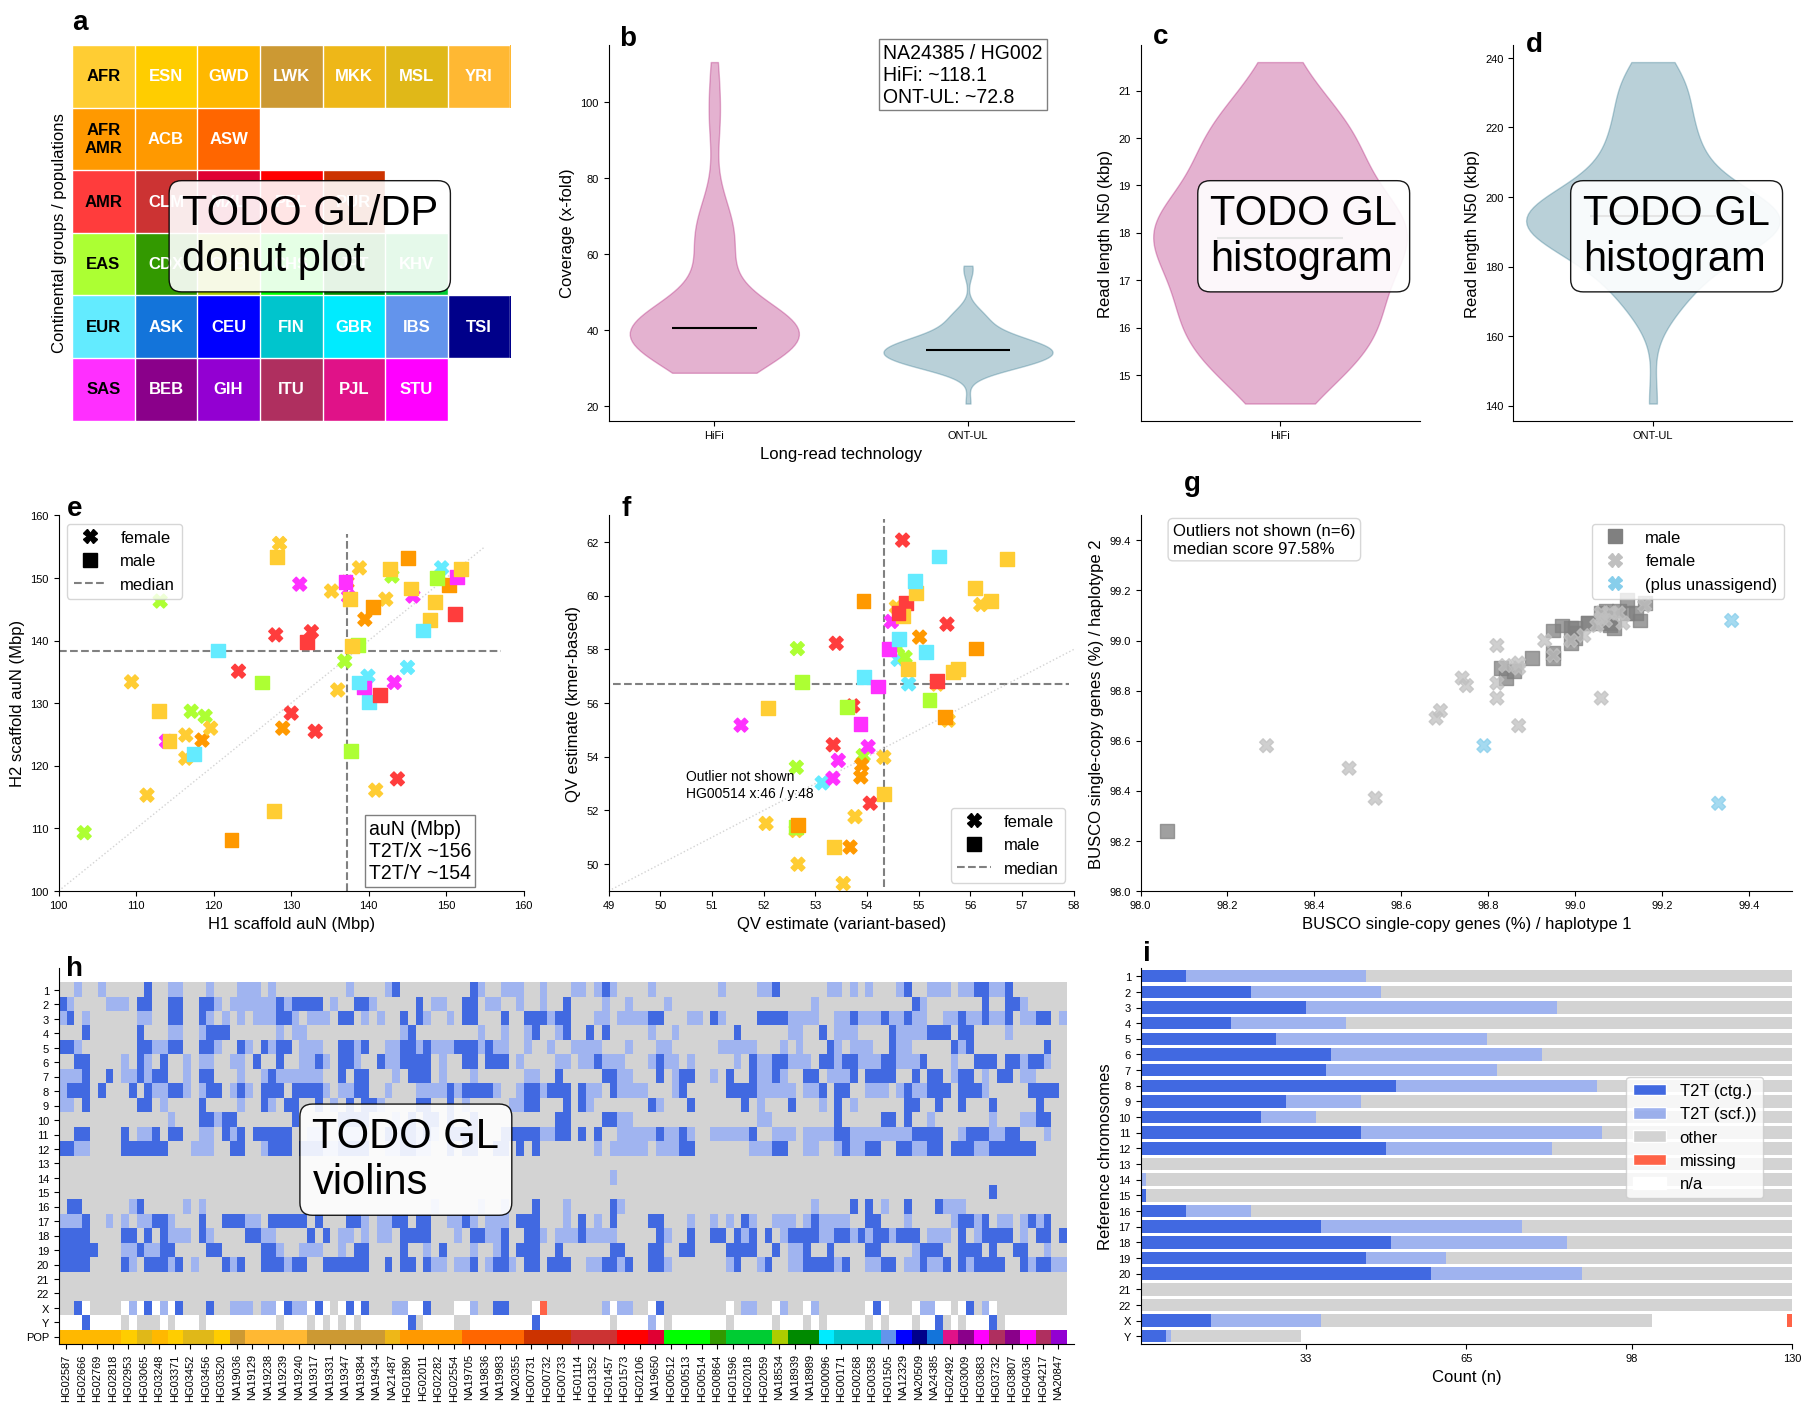

In [4]:
import pathlib
import functools
import matplotlib.pyplot as plt

%cd -q "/home/ebertp/work/code/cubi/project-run-hgsvc-hybrid-assemblies/notebooks"
_PROJECT_CONFIG_NB = str(pathlib.Path("00_project_config.ipynb").resolve(strict=True))
_PLOT_CONFIG_NB = str(pathlib.Path("05_plot_config.ipynb").resolve(strict=True))

%run $_PROJECT_CONFIG_NB
%run $_PLOT_CONFIG_NB

%run plotting/main_fig1/input-read-summary.ipynb
%run plotting/main_fig1/plot-scaffold-aun.ipynb
%run plotting/main_fig1/plot-qv-estimates.ipynb
%run plotting/main_fig1/plot-t2t-chrom.ipynb
%run plotting/main_fig1/plot-busco-scores.ipynb
%run plotting/sample-summary.ipynb

import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as pkl

import pathlib as pl

_MY_OUT_PATH = PLOT_OUT_MAIN_FIG1

fig1, axd = plt.subplot_mosaic(
    [
        ["panel_color", "panel_readcov", "panel_hifi_n50", "panel_ontul_n50"],
        ["panel_aun", "panel_qvest", "panel_gene", "panel_gene"],
        ["panel_t2tmat", "panel_t2tmat", "panel_t2tbar", "panel_t2tbar"]
    ],
    layout="constrained",
    figsize=(18,14),
    sharex=False,
    sharey=False,
    height_ratios=[1,1,1],
    width_ratios=[1.25,1.25,0.75,0.75]
)

TEXT_BOX = dict(boxstyle='round', facecolor='white', alpha=0.9)

color_panel_ax = population_legend_matrix(axd["panel_color"])
color_panel_ax.text(-0.5, -0.75, "a", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")
color_panel_ax.text(
    0.25, 0.4, "TODO GL/DP\ndonut plot",
    transform=color_panel_ax.transAxes,
    fontsize=30, bbox=TEXT_BOX
)

read_cov_panel_ax = get_read_cov_panel(axd["panel_readcov"])
read_cov_panel_ax.text(0.72, 115, "b", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")

hifi_n50_panel_ax = get_hifi_n50_panel(axd["panel_hifi_n50"])
hifi_n50_panel_ax.text(0.75, 22, "c", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")
hifi_n50_panel_ax.text(
    0.25, 0.4, "TODO GL\nhistogram",
    transform=hifi_n50_panel_ax.transAxes,
    fontsize=30, bbox=TEXT_BOX
)

ont_n50_panel_ax = get_ontul_n50_panel(axd["panel_ontul_n50"])
ont_n50_panel_ax.text(0.75, 242, "d", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")
ont_n50_panel_ax.text(
    0.25, 0.4, "TODO GL\nhistogram",
    transform=ont_n50_panel_ax.transAxes,
    fontsize=30, bbox=TEXT_BOX
)

scaff_aun_panel_ax = plot_hap_vs_hap(axd["panel_aun"])
scaff_aun_panel_ax.text(101,160, "e", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")

qv_est_panel_ax = plot_sample_vs_sample_qv(axd["panel_qvest"])
qv_est_panel_ax.text(49.25, 63, "f", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")

busco_panel_ax = get_busco_panel(axd["panel_gene"])
busco_panel_ax.text(98.1, 99.6, "g", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")

t2t_mat_panel_ax = get_t2t_matrix(axd["panel_t2tmat"])
t2t_mat_panel_ax.text(0.5, 25, "h", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")
t2t_mat_panel_ax.text(
    0.25, 0.4, "TODO GL\nviolins",
    transform=t2t_mat_panel_ax.transAxes,
    fontsize=30, bbox=TEXT_BOX
)

t2t_bar_panel_ax = get_t2t_barchart(axd["panel_t2tbar"])
t2t_bar_panel_ax.text(0.5, 25, "i", fontsize=MPL_PANEL_LABEL_SIZE, fontweight="bold")


for ext in DEFAULT_PLOT_EXT:
    out_path = _MY_OUT_PATH.joinpath(f"fig1_main.{ext}")
    save_figure(out_path, fig1)
#plt.close()